# 가랏 몬스터볼!

## 환경설정: 라이브러리 및 데이터 가져오기

In [1]:
# 환경변수 설정을 위한 os 라이브러리 임포트
import os

# 정규식 사용을 위한 re 라이브러리 임포트
import re

# Counter 사용을 위한 Coounter 패키지 임포트
from collections import Counter

# 데이터 처리 및 시각화를 위한 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 머신러닝 관련 패키지 임포트
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#matplotlib을 터미널에서 인라인으로 보기 위한 환경설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기 및 확인
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# 확인된 원본 데이터를 복사 및 재확인
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 모델의 타겟인 전설의 포켓몬 데이터셋을 분리하여 확인
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# 타겟과 대비될 일반 포켓몬의 데이터셋을 분리하여 확인
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 데이터 확인
### 결측치 확인 및 조치

In [6]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- `Type 2`를 제외한 항목에는 결측치가 없으므로, `Type 2`에 대하여 확인
    - [포켓몬 중에는 타입을 두 가지 가지는 경우가 많은데, 그 경우 타입 하나는 '타입1'로 표기되고, 다른 타입 하나는 '타입2'로 표기된다.](https://namu.wiki/w/%ED%8F%AC%EC%BC%93%EB%AA%AC%EC%8A%A4%ED%84%B0/%ED%83%80%EC%9E%85?from=%ED%8F%AC%EC%BC%93%EB%AA%AC%EC%8A%A4%ED%84%B0%20%ED%83%80%EC%9E%85#toc)
    - 위 항목을 참고하여, `Type 2`가 결측치인 것은 데이터의 오류가 아니라 항목의 특성인 것으로 추정
- 위 내용을 참고하여, `Type 1`과 `Type 2`의 분포 등을 시각화하여 확인

### Type 데이터에 대한 추가 확인

In [7]:
# Type 1과 Type 2의 속성값이 일치하지 않을 경우를 생각하여 합집합 생성

types = list(set(pokemon["Type 1"]) | set(pokemon["Type 2"]))
print(len(types), types)

19 [nan, 'Poison', 'Rock', 'Dark', 'Steel', 'Bug', 'Water', 'Fighting', 'Flying', 'Ground', 'Electric', 'Fire', 'Grass', 'Normal', 'Fairy', 'Ghost', 'Dragon', 'Psychic', 'Ice']


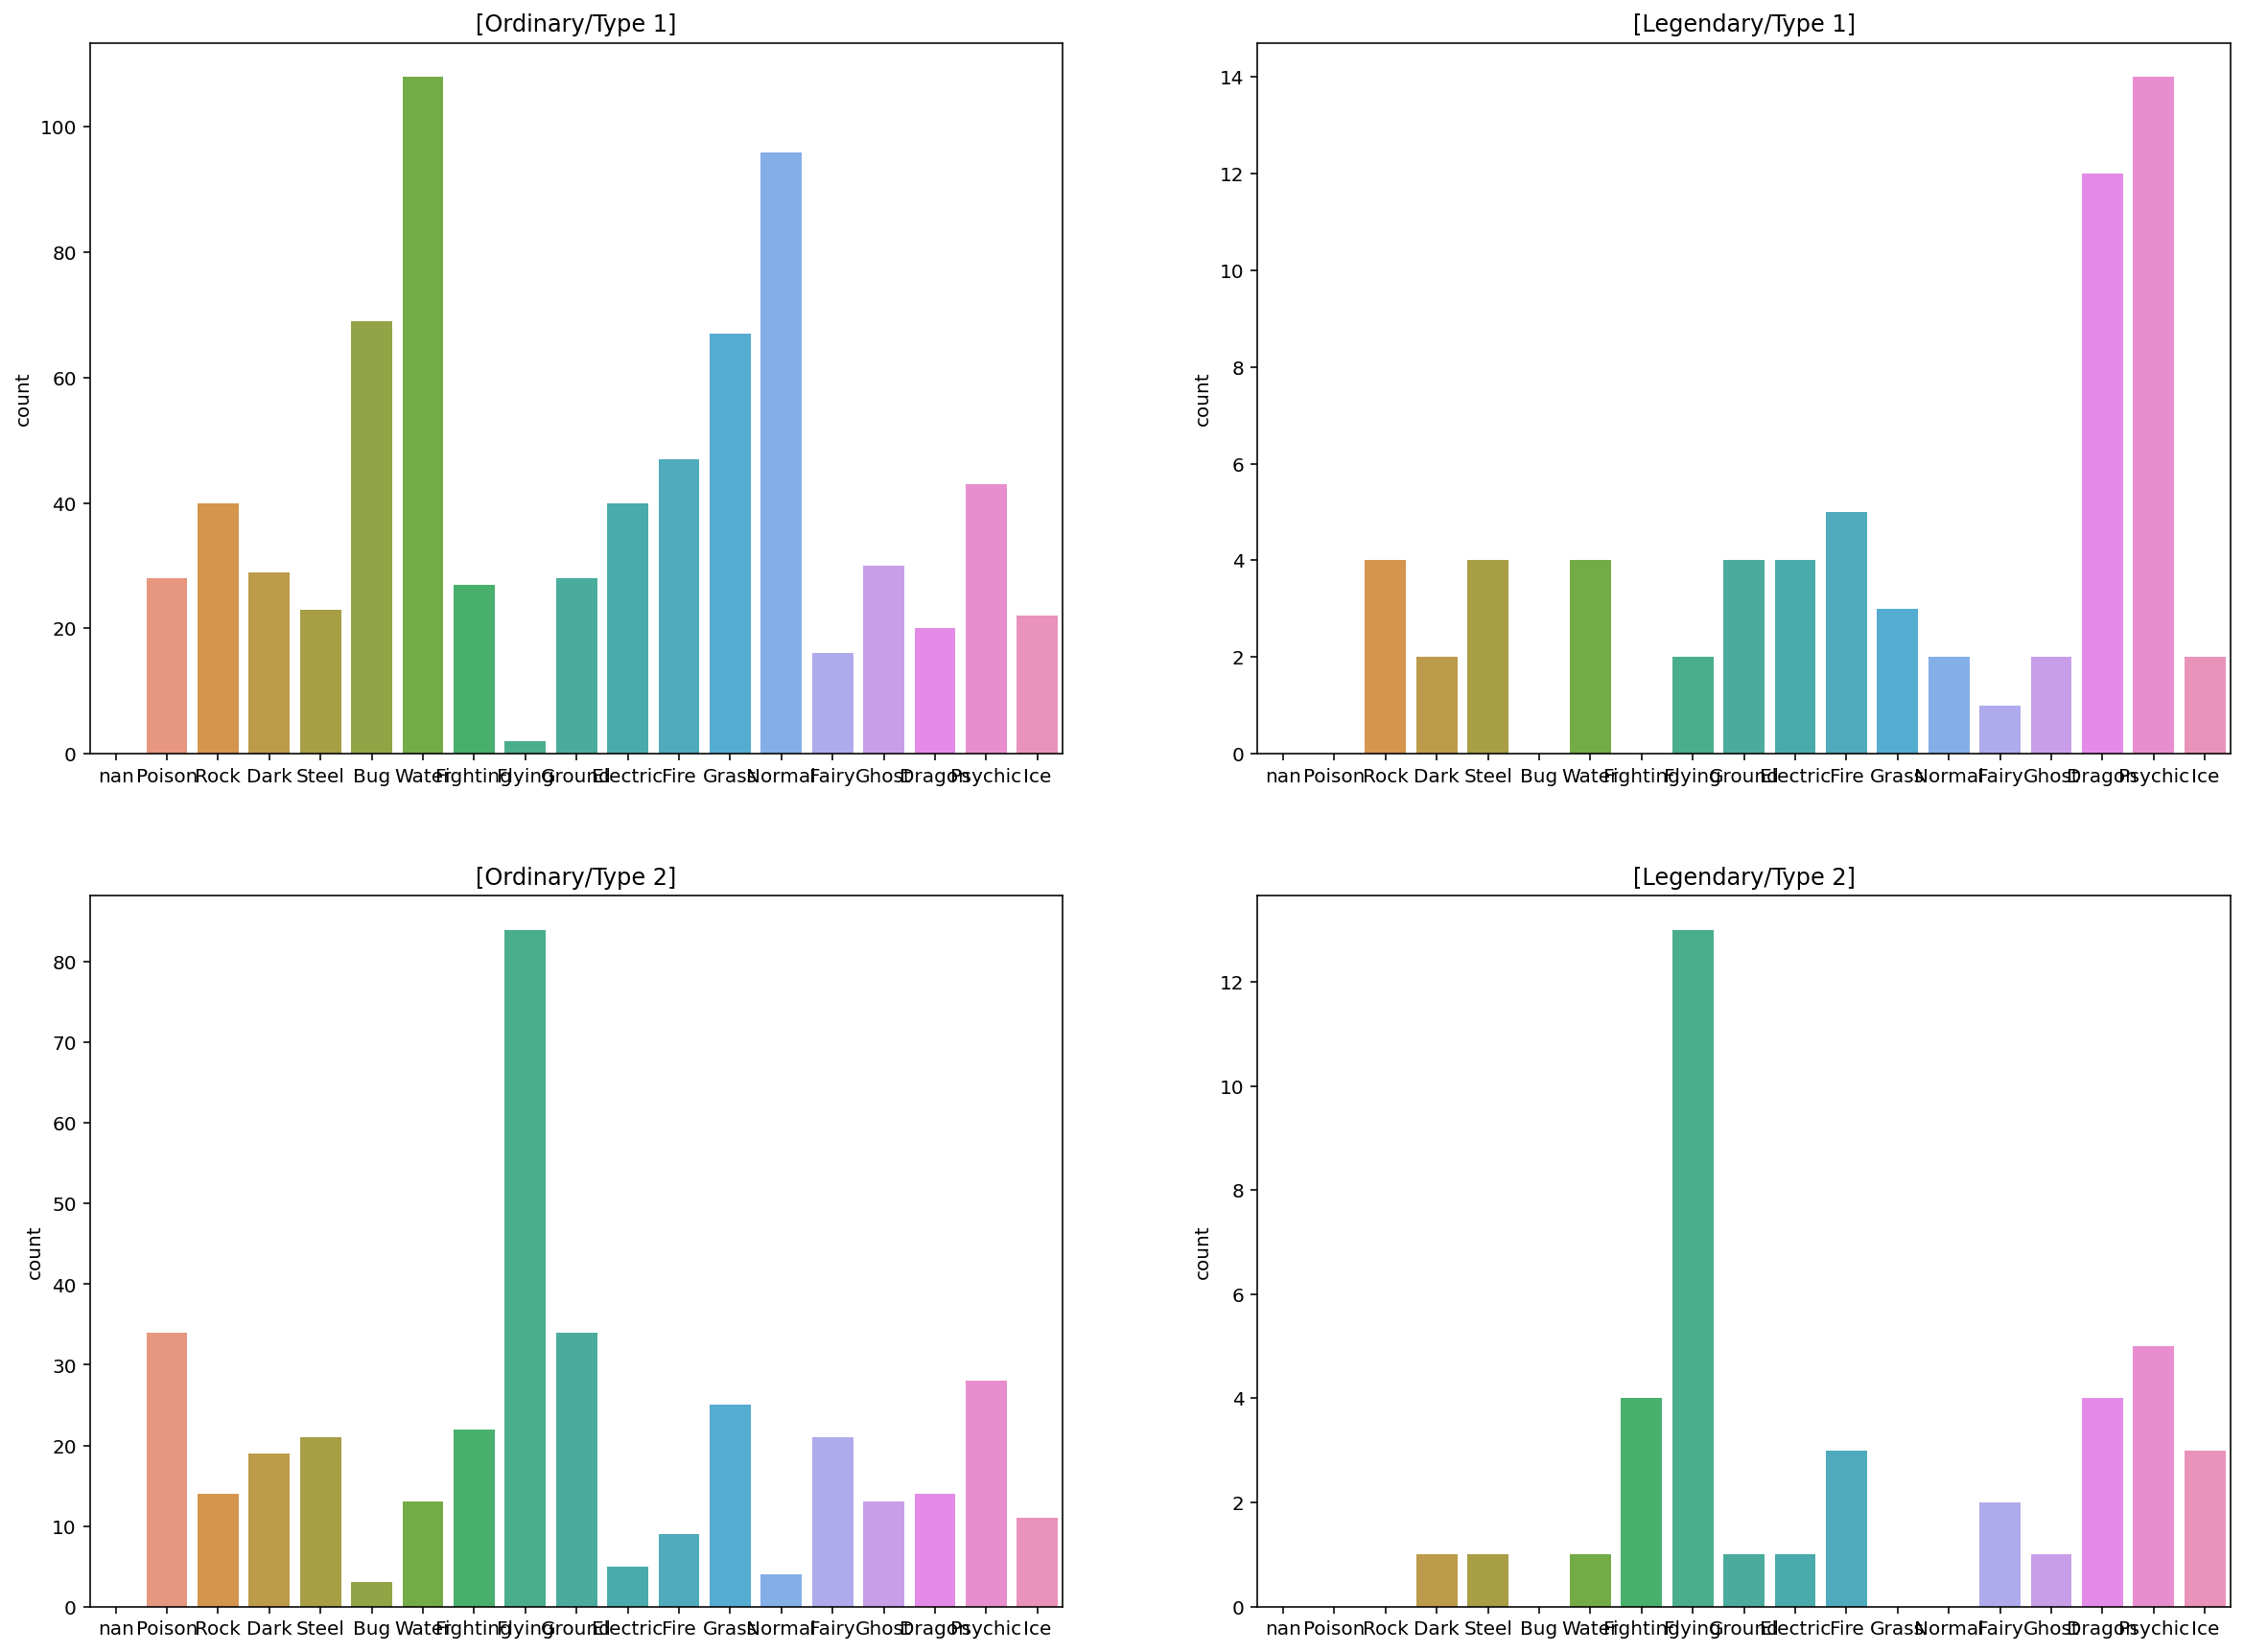

In [8]:
# 포켓몬 분류별 해당 타입을 가진 개체수 시각화

plt.figure(figsize = (20, 15))

plt.subplot(221)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary/Type 1]")

plt.subplot(222)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary/Type 1]")

plt.subplot(223)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary/Type 2]")

plt.subplot(224)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary/Type 2]")

plt.show()

In [9]:
# 피벗 테이블을 활용하여 전설의 포켓몬과 일반 포켓몬의 각 속성별 개체수 확인
# 첫 2개 열은 Type 1에 대한 개체수이며, 다음 2개 열은 Type 2에 대한 개체수임
# Type 1만을 사용하여도 전설의 포켓몬 예측이 용이할 것으로 판단하여, 이후 Type 1만을 사용

pd.concat([pd.pivot_table(pokemon, index=["Type 1"], columns="Legendary", values="#", aggfunc="count"),
          pd.pivot_table(pokemon, index=["Type 2"], columns="Legendary", values="#", aggfunc="count")],
          axis=1)

Legendary,False,True,False,True
Bug,69.0,NaN,3.0,NaN
Dark,29.0,2.0,19.0,1.0
Dragon,20.0,12.0,14.0,4.0
Electric,40.0,4.0,5.0,1.0
Fairy,16.0,1.0,21.0,2.0
Fighting,27.0,NaN,22.0,4.0
Fire,47.0,5.0,9.0,3.0
Flying,2.0,2.0,84.0,13.0
Ghost,30.0,2.0,13.0,1.0
Grass,67.0,3.0,25.0,NaN


### 데이터 확인 및 초기 분석
- 원본 데이터에 포함된 수량 데이터에 대해 확인하고 초기 분석을 실시
    - Total 수치가 실제 각 Stat의 총합과 일치하는지 확인
    - Generation 수치가 Legendary 분포에 영향을 미치는지 확인

#### Stat 값 확인

In [10]:
# 원본 데이터에서 stats을 담고 있는 5열부터 10열까지 슬라이싱하여 더한 값을 Total 열과 비교
# 원본 데이터프레임의 800개 행이 전부 출력되었으므로, Total 열 데이터에 오류 없음을 확인

pokemon[pokemon['Total'].values == pokemon.iloc[:, 5:11].values.sum(axis=1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


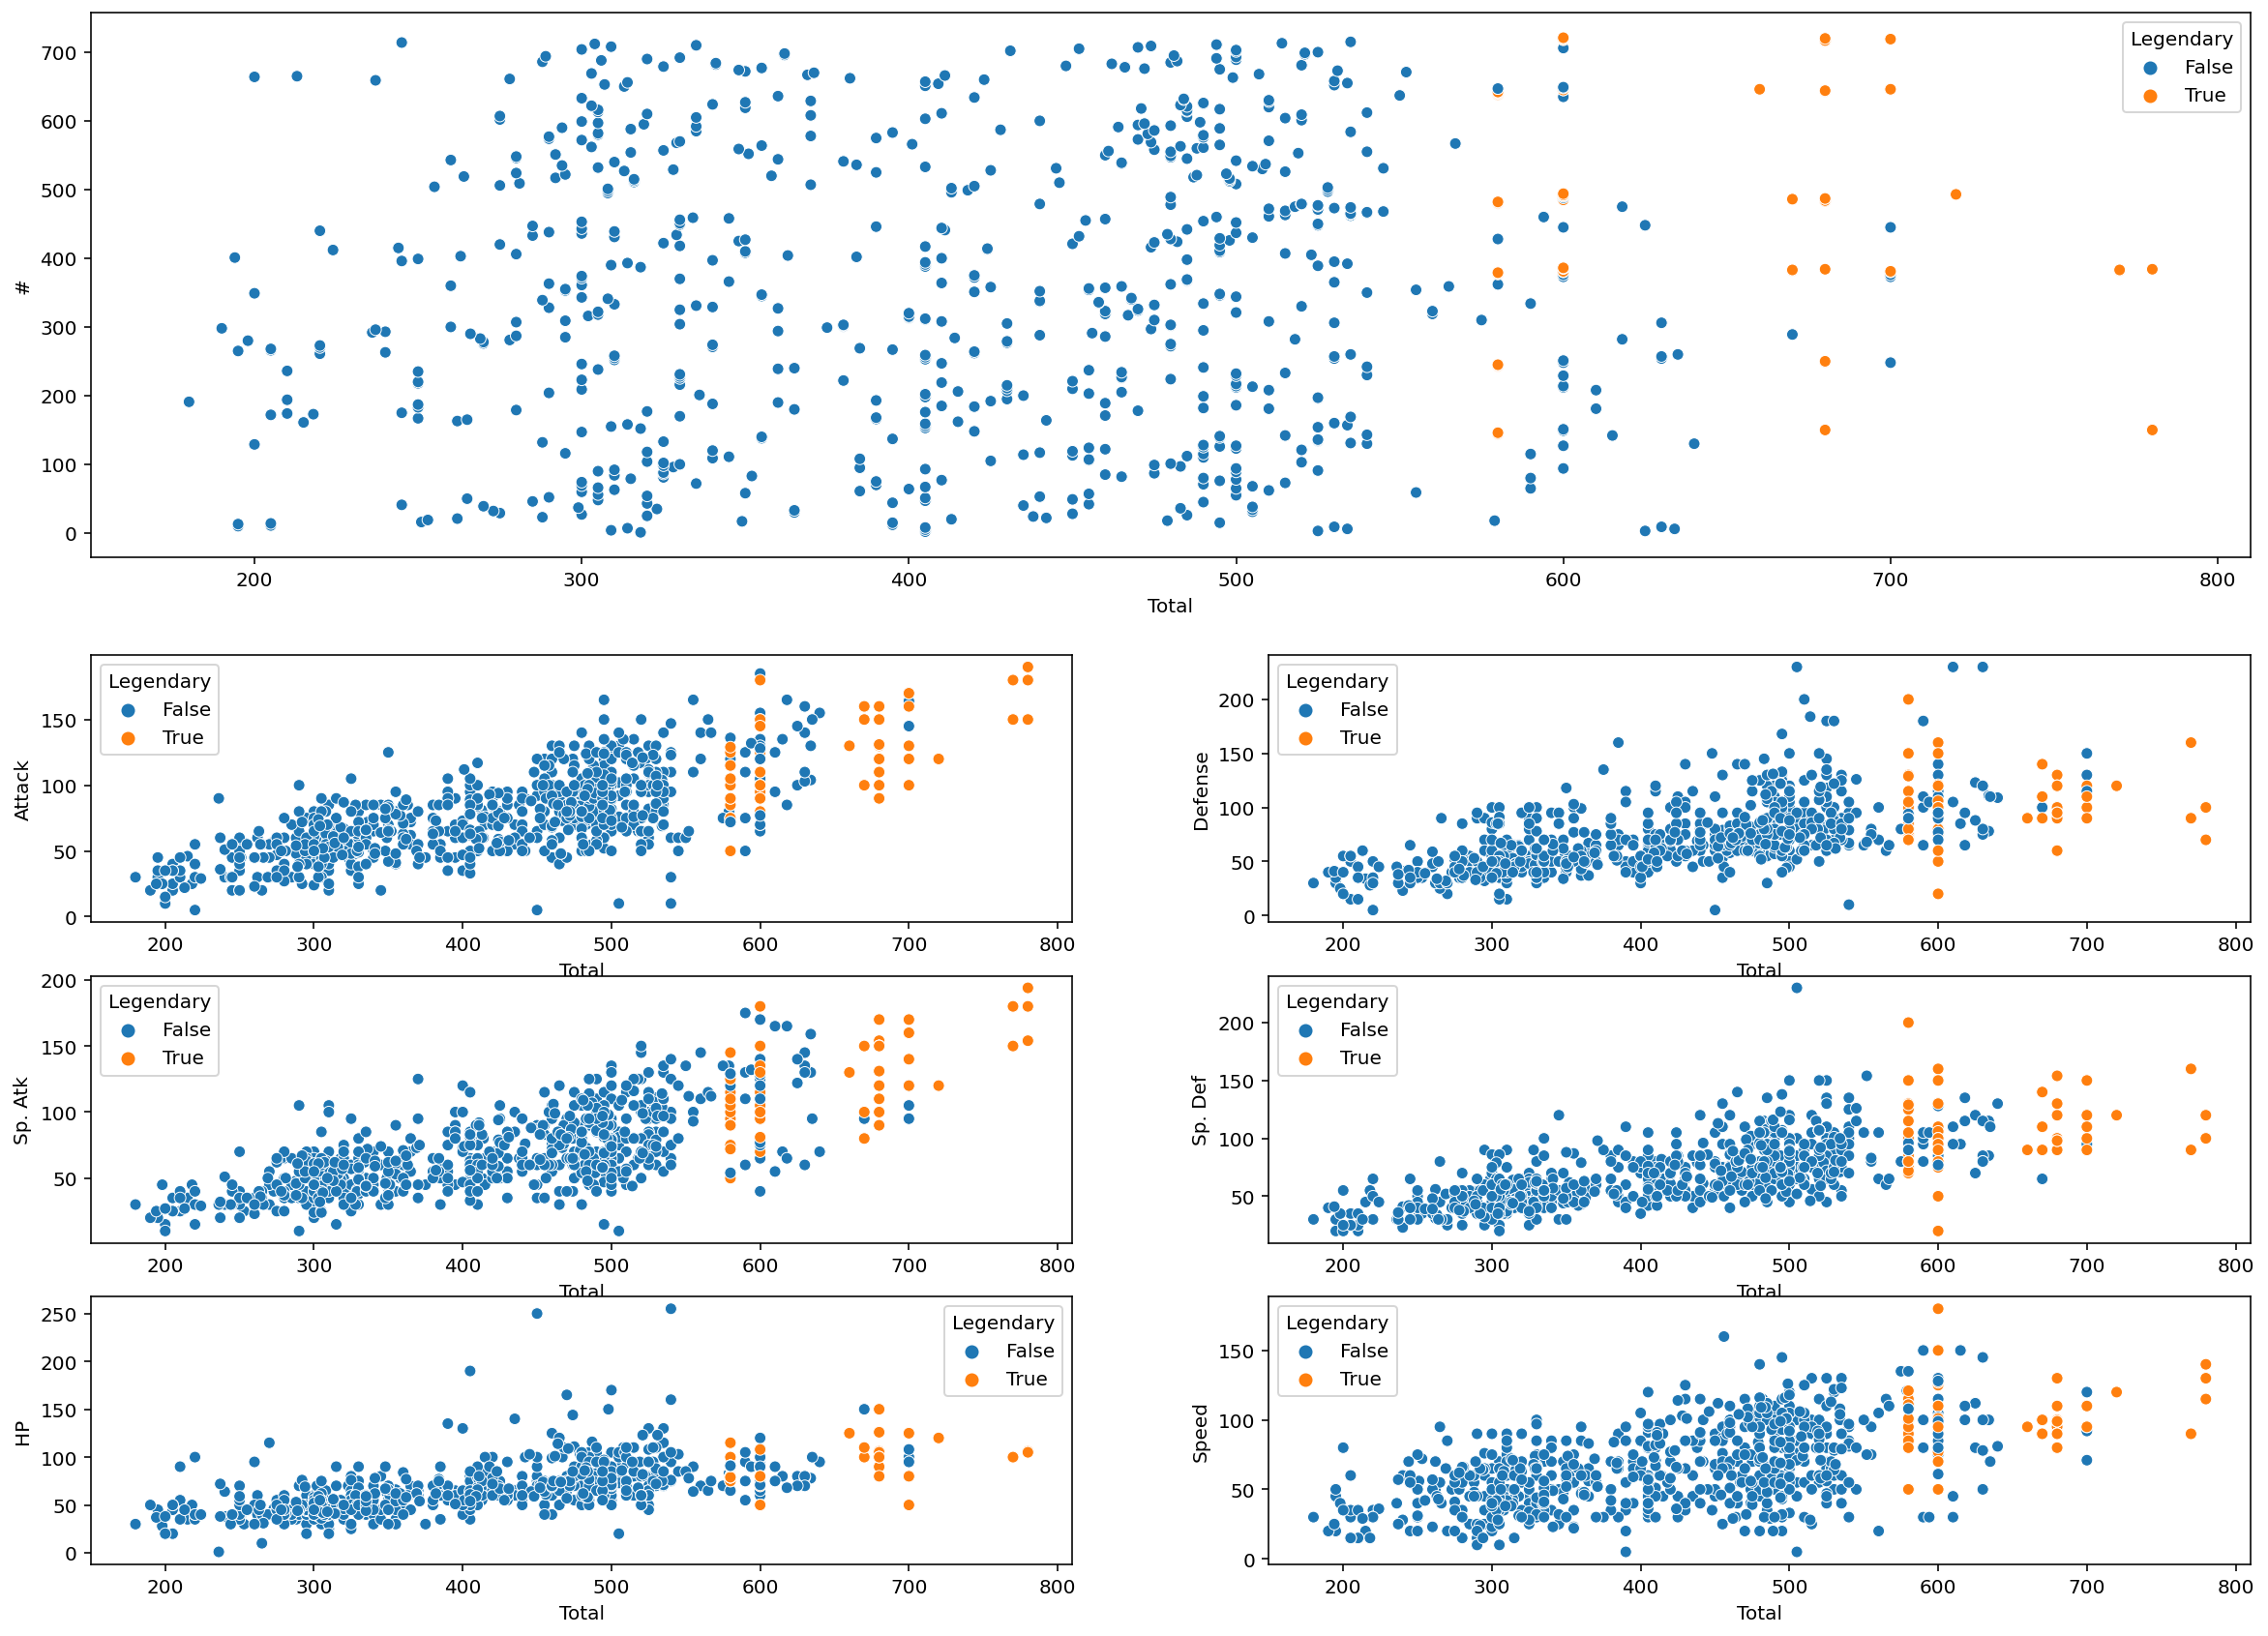

In [11]:
# 확인한 stat 데이터를 활용하여 전설의 포켓몬과 일반 포켓몬의 분포를 시각화

fig_stats = plt.figure(figsize = (20,30))

ax_total = fig_stats.add_subplot(5, 1, 1)
sns.scatterplot(data=pokemon, x="Total", y="#", hue="Legendary", ax=ax_total)

ax_attack = fig_stats.add_subplot(10, 2, 5)
sns.scatterplot(data=pokemon, x="Total", y="Attack", hue="Legendary", ax=ax_attack)

ax_defense = fig_stats.add_subplot(10, 2, 6)
sns.scatterplot(data=pokemon, x="Total", y="Defense", hue="Legendary", ax=ax_defense)

ax_spatk = fig_stats.add_subplot(10, 2, 7)
sns.scatterplot(data=pokemon, x="Total", y="Sp. Atk", hue="Legendary", ax=ax_spatk)

ax_spdfs = fig_stats.add_subplot(10, 2, 8)
sns.scatterplot(data=pokemon, x="Total", y="Sp. Def", hue="Legendary", ax=ax_spdfs)

ax_HP = fig_stats.add_subplot(10, 2, 9)
sns.scatterplot(data=pokemon, x="Total", y="HP", hue="Legendary", ax=ax_HP)

ax_Speed = fig_stats.add_subplot(10, 2, 10)
sns.scatterplot(data=pokemon, x="Total", y="Speed", hue="Legendary", ax=ax_Speed)

plt.show()

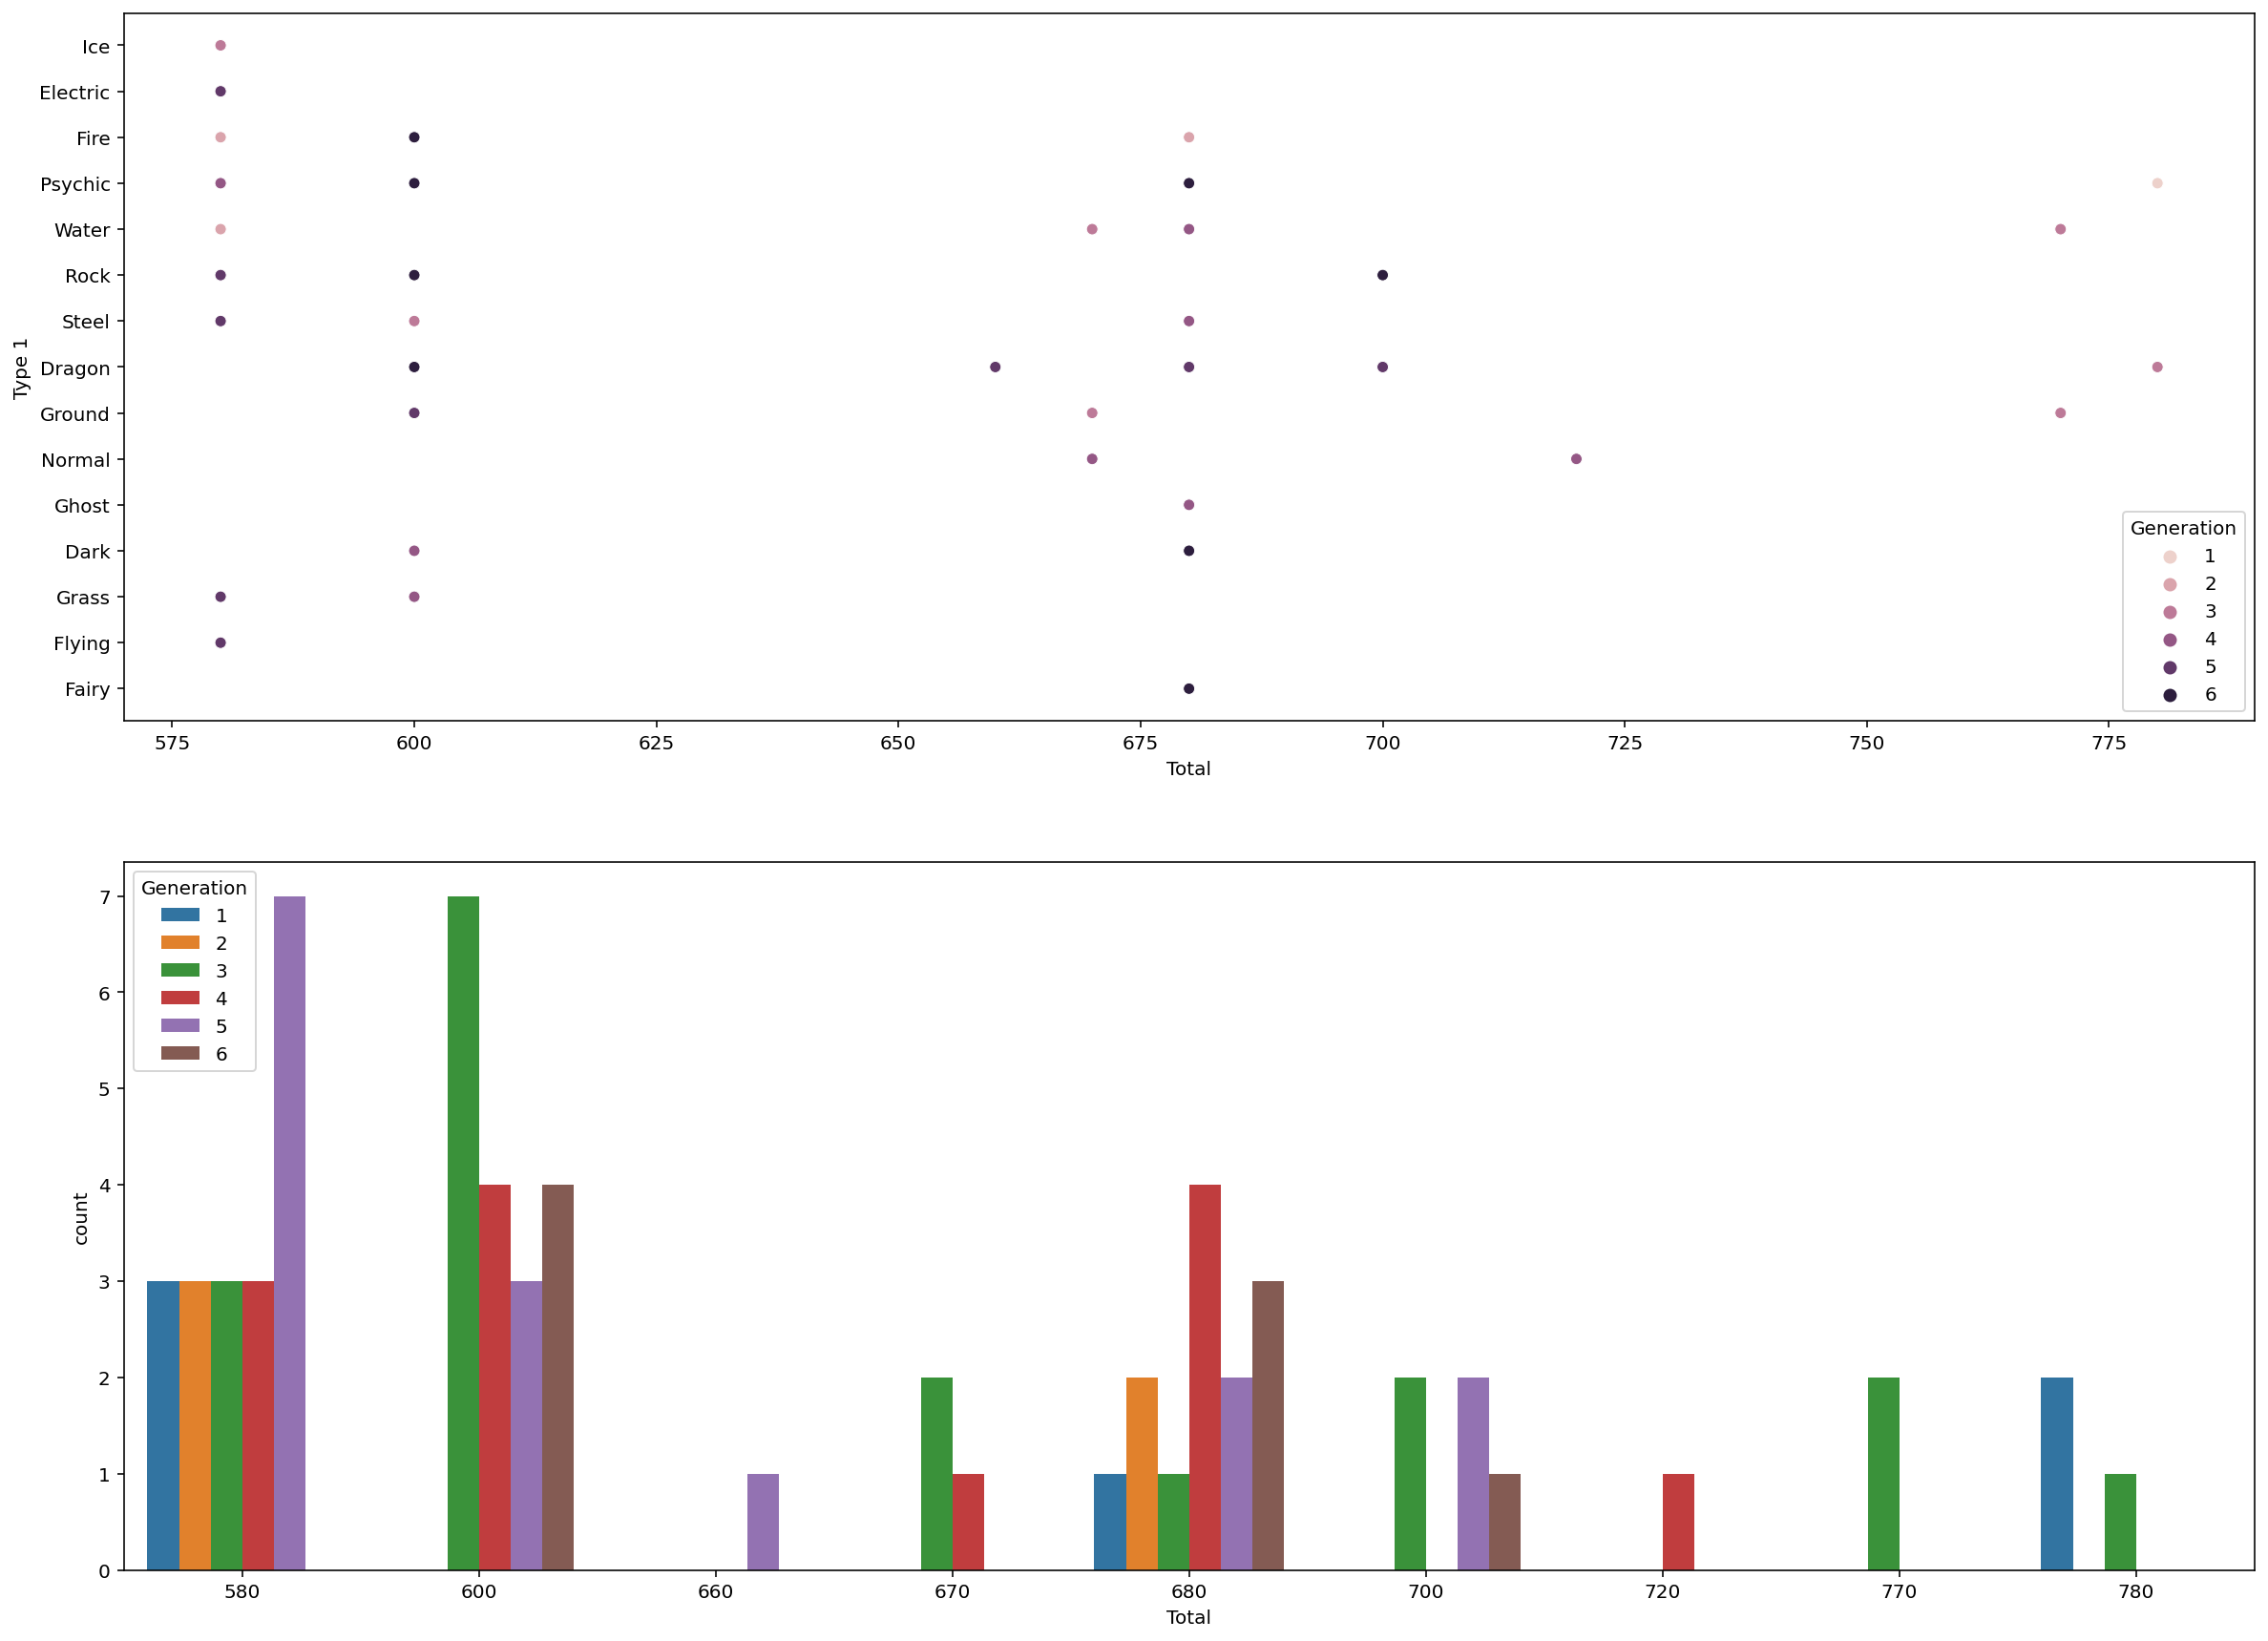

In [12]:
# 위 그래프를 통해 확인할 때, 전설 포켓몬의 Total 값이 일부 값에 집중된 것으로 보임
# 위 추측을 산점도를 통해 확인

fig_legendary = plt.figure(figsize = (20,15))
ax_legendary = fig_legendary.add_subplot(2, 1, 1)
ax_count = fig_legendary.add_subplot(2, 1, 2)

sns.scatterplot(data=legendary, y="Type 1", x="Total", hue="Generation", ax = ax_legendary)
sns.countplot(data=legendary, x="Total", hue="Generation", ax = ax_count)

plt.show()

#### Generation 값 확인

<AxesSubplot:xlabel='Generation'>

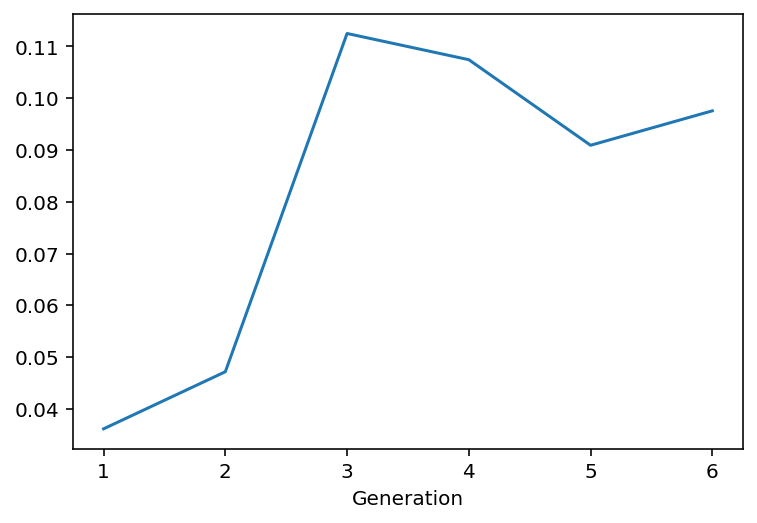

In [13]:
# 위 시각화, 특히 countplot을 통해 Generation이 전설 포켓몬 분포에 영향을 미침을 확인함
# Generation이 독립변수로 전설의 포켓몬 여부에 영향을 주는지 등을 추가로 확인하고자 함
# pokemon 데이터프레임을 Generation으로 그룹화하여 세대별 비율 확인

pokemon_gen = pokemon.groupby("Generation")
gen_ratio = pokemon_gen['Legendary'].sum() / pokemon_gen["Name"].count()
gen_ratio.plot()

#### 이름 확인
- 데이터를 직접 확인할 때, 일부 단어가 여러 이름에서 반복됨을 확인할 수 있음
- 특히, "Mega" 등의 단어는 원래 이름에 결합하여 재등장되어 이름의 길이를 크게 늘림
- 아래의 예를 통해, 전설의 포켓몬 중 이름이 긴 포켓몬이 많음을 확인할 수 있음

In [14]:
pokemon[pokemon["Legendary"] == True].tail(25)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
551,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
553,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
699,638,Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
700,639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
702,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
704,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
705,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True


그러나, $ \frac{\text{이름이 긴 포켓몬}}{\text{전설의 포켓몬}} $ 이 크다고 할 때, $ \frac{\text{전설의 포켓몬}}{\text{이름이 긴 포켓몬}} $ 이 크다고 할 수 없음: 따라서 이름이 긴 포켓몬 중 전설의 포켓몬 비율을 확인하고자 함

<AxesSubplot:xlabel='name_len'>

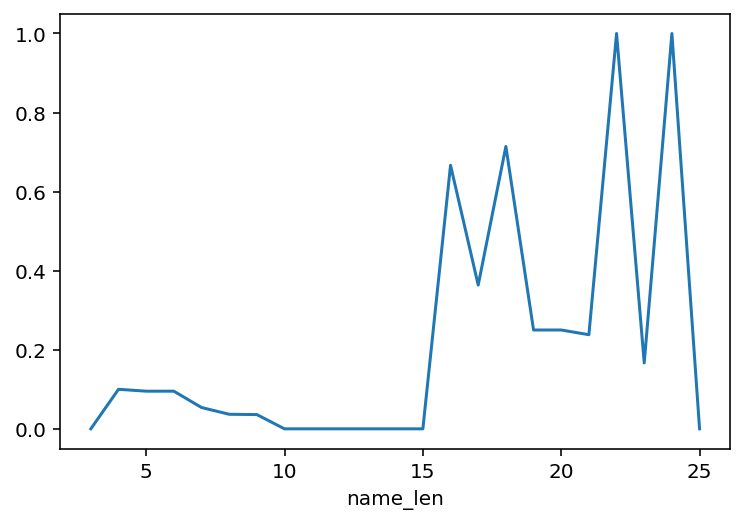

In [15]:
# pokemon 데이터프레임에 이름의 길이를 뜻하는 열을 추가함

pokemon["name_len"] = pokemon["Name"].apply(lambda i: len(i))    

# 특정 길이의 이름을 가진 포켓몬 중 전설의 포켓몬의 비율을 시각화
name_len_ratio = pokemon.groupby("name_len")
name_len_ratio = name_len_ratio['Legendary'].sum() / name_len_ratio["Name"].count()
name_len_ratio.plot()

### 데이터 평가
- Type 데이터의 경우,
    - Type 1의 분포가 전설 포겟몬과 일반 포켓몬 사이에 크게 다르므로, 유용한 자료로 판단됨
    - Type 2는 분포가 크게 차이나지 않으므로, 일차적으로는 모델에서 제외하나 최적화 가정에서 추가 여부를 고려
- stat 데이터의 경우
    - 개별 stat의 크기는 전설의 포켓몬과 일반 포켓몬이 뚜렷이 구별되지 않음
    - 그러나 총합 stat은 뚜렷이 구분되는 경향을 보이며, 일반 포켓몬에 비해 전설 포켓몬의 분포 범위가 좁음
    - 따라서 Total 열이 매우 유용한 특성을 보일 것으로 판단됨
- Generation 데이터의 경우
    - 세대별 차이가 유의하며, 타겟 분류에 유용할 것으로 판단됨
    - 그러나 다른 타겟과의 상관관계가 높아 모델에 혼란을 줄 수 있는 점을 유의
- Name 데이터의 경우
    - 이름의 길이값이 전설의 포켓몬 판단 유무에 매우 중요한 영향을 끼침
    - 이름이 길수록 전설의 포켓몬의 비중이 높아지며, 특히 이름이 15 이상인 경우 그러함
    - 이름 중 특정 단어가 반복되는 경향이 있으며, 이는 전설 포켓몬 여부와 관련될 수 있음

### 데이터 전처리
- 주어진 데이터의 대부분이 수량 데이터이나, 이름은 문자열 데이터로 이루어져 있음
- 이를 모델에 입력하기 위해 전처리 및 토큰화를 시행함

#### 이름 데이터 전처리
- 이름을 모두 알파벳 문자로 전환하고, 대문자를 기준으로 분리하여 토큰화

In [16]:
# .isalpha() 함수를 사용하기 위해 이름에서 공백을 제거하고, name.isalpha() == False인 행을 출력

pokemon["Name"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,False
131,122,Mr.Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False
487,439,MimeJr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False
794,718,Zygarde50%Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,False


In [17]:
# 출력된 행의 수가 많지 않고, 반복되는 패턴이 없으며, 알파벳으로 변환하기 난해하지 않음을 확인함
# 출력된 행의 이름을 수동으로 변환 후 name.isalpha() == Flase인 행을 재출력하여 확인

pokemon = pokemon.replace(to_replace="Nidoran♀", value="NidoranX")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="NidoranY")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr.Mime", value="MrMime")
pokemon = pokemon.replace(to_replace="Porygon2", value="PorygonTwo")
pokemon = pokemon.replace(to_replace="Ho-oh", value="HoOh")
pokemon = pokemon.replace(to_replace="MimeJr.", value="MimeJr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="PorygonZ")
pokemon = pokemon.replace(to_replace="Zygarde50%Forme", value="ZygardeForme")

pokemon["name_isalpha"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["name_isalpha"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,name_isalpha


In [18]:
# 이름 토큰화에 필요한 발상을 얻기 위해 이름이 긴 포켓몬을 일부 출력

pokemon[pokemon["name_len"] > 15]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,name_isalpha
3,3,VenusaurMegaVenusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
7,6,CharizardMegaCharizardX,Fire,Dragon,634,78,130,111,130,85,100,1,False,25,True
8,6,CharizardMegaCharizardY,Fire,Flying,634,78,104,78,159,115,100,1,False,25,True
12,9,BlastoiseMegaBlastoise,Water,NaN,630,79,103,120,135,115,78,1,False,23,True
19,15,BeedrillMegaBeedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuperSize,Ghost,Grass,494,85,100,122,58,75,54,6,False,19,True
794,718,ZygardeForme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True
796,719,DiancieMegaDiancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True
797,720,HoopaHoopaConfined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True


In [19]:
# 이름을 구성하는 각 단어가 대문자로 시작하는 것에 착안하여 토큰화 시행

# 토큰화 함수 설정
def tokenize(name):
    tokens = []
    name_split = name.split(" ")

    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

# 데이터프레임에 저장된 모든 포켓몬의 이름을 토큰화하고, 중복을 제거하기 위해 자료형 변환
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

In [20]:
# token의 사용횟수를 내림차순으로 확인하고, 토큰의 사용횟수가 균일하지 않음을 확인함
Counter(token_set).most_common(len(set(token_set)))

# 위 결과를 바탕으로, 이름에 20번째까지 많이 쓰인 토큰을 포함하는지를 원-핫 인코딩
for token, _ in Counter(token_set).most_common(20):
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

#### 타입 데이터 전처리
- 타입 데이터를 원-핫 인코딩 하기로 결정함

In [21]:
# 원-핫 인코딩 적용을 위해 기존에 작성한 types 리스트를 재출력

types

[nan,
 'Poison',
 'Rock',
 'Dark',
 'Steel',
 'Bug',
 'Water',
 'Fighting',
 'Flying',
 'Ground',
 'Electric',
 'Fire',
 'Grass',
 'Normal',
 'Fairy',
 'Ghost',
 'Dragon',
 'Psychic',
 'Ice']

In [22]:
# nan 항목은 다른 모든 타입의 코드가 Flase인 것으로 표현 가능하므로 삭제함
types = [x for x in types if x == x]

# 남은 타입에 대해 원-핫 인코딩 시행
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

In [23]:
# 전처리된 데이터프레임 확인
print(types)

['Poison', 'Rock', 'Dark', 'Steel', 'Bug', 'Water', 'Fighting', 'Flying', 'Ground', 'Electric', 'Fire', 'Grass', 'Normal', 'Fairy', 'Ghost', 'Dragon', 'Psychic', 'Ice']


## 베이스라인 모델 작성 및 테스트

In [24]:
# 모델에 입력시키기 위한 feature의 columns를 확인

print(len(pokemon.columns))
print(pokemon.columns)
print(pokemon.columns[4:12].append(pokemon.columns[13:]))

53
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_len',
       'name_isalpha', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa',
       'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Incarnate',
       'Therian', 'Diancie', 'Primal', 'Giratina', 'Shaymin', 'Tornadus',
       'Thundurus', 'Landorus', 'Poison', 'Rock', 'Dark', 'Steel', 'Bug',
       'Water', 'Fighting', 'Flying', 'Ground', 'Electric', 'Fire', 'Grass',
       'Normal', 'Fairy', 'Ghost', 'Dragon', 'Psychic', 'Ice'],
      dtype='object')
Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'name_len', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Rayquaza', 'Incarnate', 'Therian', 'Diancie', 'Primal', 'Giratina',
       'Shaymin', 'Tornadus', 'Thundurus', 'Landorus', 'Poison', 'Rock',
     

In [25]:
#베이스라인 데이터 입력

baseline_faetures = pokemon.columns[4:12].append(pokemon.columns[13:])
baseline_target = 'Legendary'

baseline_data = pd.DataFrame()
baseline_lable = pd.DataFrame(pokemon[baseline_target])

for feature in baseline_faetures:
    baseline_data[f'{feature}'] = pokemon[f'{feature}']

# 베이스라인 데이터를 훈련 데이터와 검증 데이터로 분리
    
basedata_train, basedata_test, baselable_train, baselable_test = train_test_split(baseline_data, baseline_lable , test_size=0.2, random_state=15)

print(basedata_train.shape, baselable_train.shape)
print(basedata_test.shape, baselable_test.shape)

(640, 48) (640, 1)
(160, 48) (160, 1)


In [26]:
# 베이스라인 모델을 의사결정나무 모델로 학습시키고 성과 평가

baseline_model = DecisionTreeClassifier(random_state=25)
baseline_model.fit(basedata_train, baselable_train)
baselable_pred = baseline_model.predict(basedata_test)

print(confusion_matrix(baselable_test, baselable_pred))
print(classification_report(baselable_test, baselable_pred))

[[142   5]
 [  1  12]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



## 비교모델 작성 및 테스트

In [27]:
# 비교모델 작성을 위한 패키지 임포트

from sklearn.ensemble import RandomForestClassifier  
from sklearn import svm  
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 

### 비교모델을 임의숲 모델로 학습시키고 성과 평가
- 회고
    - baselable_train의 형식이 데이터프레임이어서 그대로 넣으면 경고를 띄우는 문제가 있었다.
    - 이를 데이터프레임의 컬럼을 호출해서 데이터시리즈로 만들어서 입력하여 해결하였다.
    - 동일한 데이터를 사용하였을 때 의사결정나무 모델에서는 경고가 발생하지 않은 이유를 모르겠다.
- 성과 평가
    - 베이스라인에 비해 정확도가 떨어지며, 특히 전설 포켓몬에 대한 recall값이 크게 떨어진다.

In [28]:
comparison_randomforest = RandomForestClassifier(random_state=25)
comparison_randomforest.fit(basedata_train, baselable_train[baseline_target])
comparison_pred = comparison_randomforest.predict(basedata_test)

print(confusion_matrix(baselable_test, comparison_pred))
print(classification_report(baselable_test, comparison_pred))

[[142   5]
 [  3  10]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       147
        True       0.67      0.77      0.71        13

    accuracy                           0.95       160
   macro avg       0.82      0.87      0.84       160
weighted avg       0.95      0.95      0.95       160



### 비교모델을 SVM 모델로 학습시키고 성과 평가
- 회고
    - 임의숲 모델과 동일한 문제가 발생(baselable_train의 차원 문제)하여 동일한 방식으로 조치하였다.
- 성과 평가
    - 베이스라인에 비해 정확도가 떨어지며, 특히 전설 포켓몬에 대한 recall값이 매우 크게 떨어진다.

In [29]:
comparison_svm = svm.SVC()
comparison_svm.fit(basedata_train, baselable_train[baseline_target])
comparison_pred = comparison_svm.predict(basedata_test)

print(confusion_matrix(baselable_test, comparison_pred))
print(classification_report(baselable_test, comparison_pred))

[[145   2]
 [  6   7]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147
        True       0.78      0.54      0.64        13

    accuracy                           0.95       160
   macro avg       0.87      0.76      0.80       160
weighted avg       0.95      0.95      0.95       160



### 비교모델을 로지스틱 회귀모델로 학습시키고 성과 평가
- 회고
    - 기본 iteration 안에서 모델이 수렴하지 않아 횟수를 증가시켰다.
- 성과평가
    - 가장 성과가 탁월하다.

In [30]:
comparison_logistic = LogisticRegression(max_iter=3000)
comparison_logistic.fit(basedata_train, baselable_train[baseline_target])
comparison_pred = comparison_logistic.predict(basedata_test)

print(confusion_matrix(baselable_test, comparison_pred))
print(classification_report(baselable_test, comparison_pred))

[[144   3]
 [  2  11]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       147
        True       0.79      0.85      0.81        13

    accuracy                           0.97       160
   macro avg       0.89      0.91      0.90       160
weighted avg       0.97      0.97      0.97       160



## 회고
- Pandas를 배울 때 충분히 복습하지 않았더니 얼마 지났다고 많이 까먹었다. 복습을 열심히 하자.
- 노드에서 제공된 코드를 그대로 사용하지 않고 변수명이라도 바꿔서 다시 써보는 연습은 언제나 좋은 것 같다.
- 데이터프레임을 조금만 더 자유롭게 다룰 수 있었다면 조금 더 다양한 그래프도 그려보고 다양한 시도를 했을텐데 아쉽다.
- SVM 모델에 대해서 이해하지 않고 사용하다보니 계속해서 신경이 쓰인다. 공부해보자.
- 비가 와서 그런가 피곤하다...